In [1]:
#Standard
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy.random import randn
from pandas import Series

In [2]:
# Stats
from scipy import stats

In [3]:
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

In [14]:
dataset1 = randn(100)

(array([ 2.,  1.,  8., 15., 16., 20., 20., 14.,  3.,  1.]),
 array([-2.66044762, -2.19130228, -1.72215695, -1.25301162, -0.78386628,
        -0.31472095,  0.15442439,  0.62356972,  1.09271506,  1.56186039,
         2.03100573]),
 <a list of 10 Patch objects>)

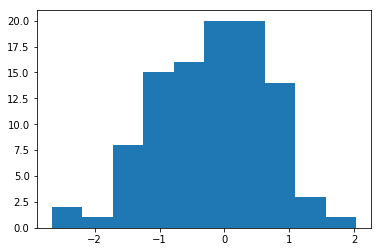

In [15]:
plt.hist(dataset1)

In [16]:
dataset2 = randn(80)

(array([ 4.,  4.,  3., 13., 13., 10., 12.,  9.,  3.,  9.]),
 array([-2.29320021, -1.86984617, -1.44649213, -1.02313809, -0.59978405,
        -0.17643001,  0.24692403,  0.67027807,  1.09363211,  1.51698615,
         1.94034019]),
 <a list of 10 Patch objects>)

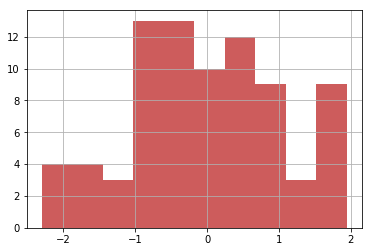

In [17]:
plt.grid(True)
plt.hist(dataset2, color = 'indianred')

(array([0.11810446, 0.11810446, 0.17715669, 0.05905223, 0.05905223,
        0.11810446, 0.47241784, 0.29526115, 0.47241784, 0.29526115,
        0.23620892, 0.35431338, 0.47241784, 0.23620892, 0.23620892,
        0.29526115, 0.11810446, 0.05905223, 0.29526115, 0.23620892]),
 array([-2.29320021, -2.08152319, -1.86984617, -1.65816915, -1.44649213,
        -1.23481511, -1.02313809, -0.81146107, -0.59978405, -0.38810703,
        -0.17643001,  0.03524701,  0.24692403,  0.45860105,  0.67027807,
         0.88195509,  1.09363211,  1.30530913,  1.51698615,  1.72866317,
         1.94034019]),
 <a list of 20 Patch objects>)

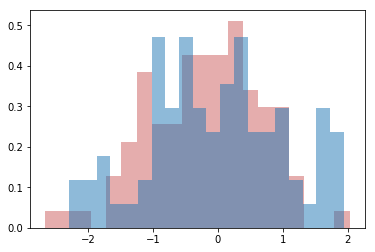

In [18]:
plt.hist(dataset1,density = True, color = 'indianred', alpha = 0.5,bins = 20)
#alpha is used to control transparency 
plt.hist(dataset2,density = True, alpha = 0.5,bins = 20)
#alpha is used to control transparency 

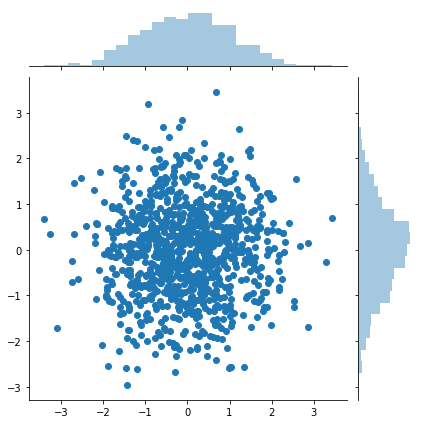

In [19]:
#This two dataset can be rep as a joint distribution using jointplot
data1 = randn(1000)
data2 = randn(1000)

sns.jointplot(data1,data2)



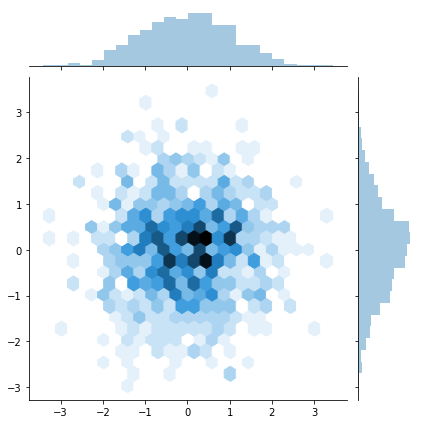

In [20]:
sns.jointplot(data1,data2,kind = 'hex')

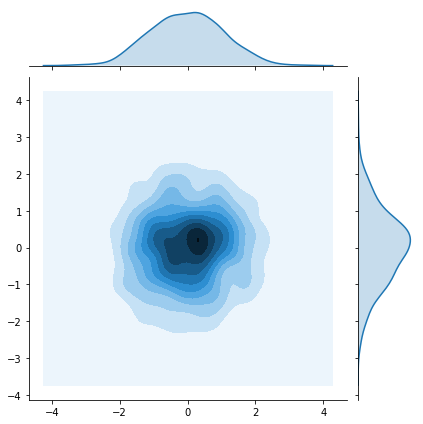

In [21]:
sns.jointplot(data1,data2,kind = 'kde')

In [22]:
##Kernel density Extimation plot

In [23]:
#Standard
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy.random import randn

In [24]:
# Stats
from scipy import stats

In [25]:
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
%matplotlib inline

In [27]:
#Rugplot
dataset3 = randn(25)

(0, 1)

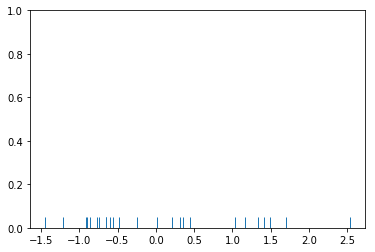

In [115]:
sns.rugplot(dataset3)
plt.ylim(0,1)

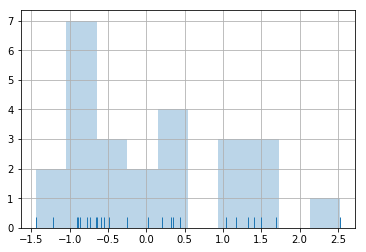

In [30]:
#Let plot a Hist untop of d rugplot
plt.hist(dataset3, alpha = 0.3)
plt.grid(True)
sns.rugplot(dataset3)

(0, 1)

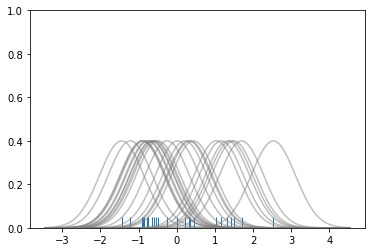

In [31]:
#The  KDE is going to rep each of this tick mark with a Guassian Bases Function
sns.rugplot(dataset3)
x_min = dataset3.min() - 2
x_max = dataset3.max() + 2

#We set x-axis to be 100 equally space point from xmin to xmax 
x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ((4*dataset3.std()**5)/(3*len(dataset3))) **0.2

kernel_list = []
for data_point in dataset3:
    #create a kernel for each point & append it to d kernel_list
    kernel =  stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Set up a scale for ploting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
plt.ylim(0,1) 
    

Text(0.5, 0.98, 'Sum of the basis Function')

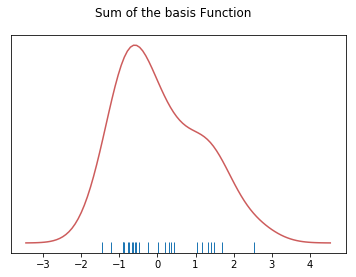

In [33]:
sum_of_kde = np.sum(kernel_list, axis = 0)
fig = plt.plot(x_axis,sum_of_kde, color = 'indianred')

sns.rugplot(dataset3)

plt.yticks([])

plt.suptitle('Sum of the basis Function')


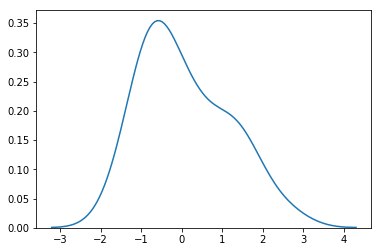

In [116]:
#Faster way using just seaborn

sns.kdeplot(dataset3)

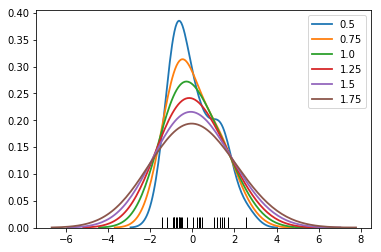

In [34]:
#We can adjust d bandwidth of seaborn kde plot to make it less sensity to high frequency
sns.rugplot(dataset3, color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset3,bw = bw, lw = 1.8, label = bw)
    



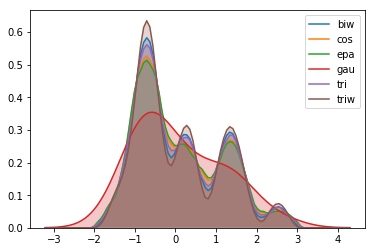

In [36]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset3, kernel = kern, label = kern, shade = True)

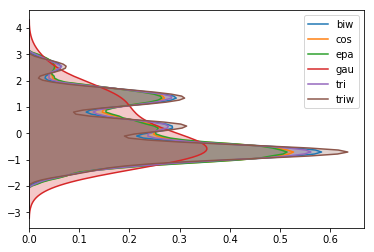

In [37]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset3, kernel = kern, label = kern, shade = True,vertical = True)

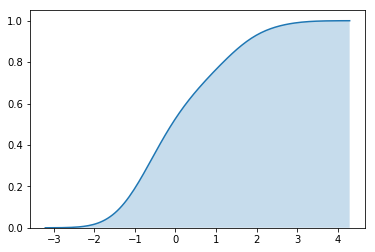

In [117]:
  sns.kdeplot(dataset3, cumulative = True,shade = True)

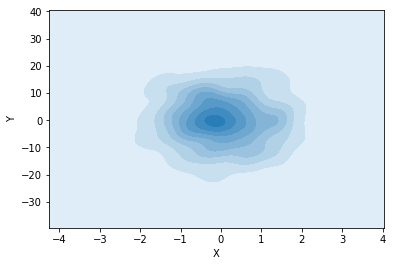

In [38]:
#kde plot for multivariate density estimation
mean = [0,0]

cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2, columns = ['X','Y'])

sns.kdeplot(dframe.X,dframe.Y,shade = True)

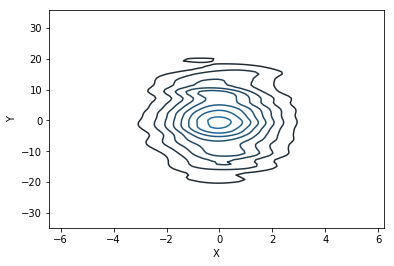

In [39]:
sns.kdeplot(dframe.X,dframe.Y,bw = 1)

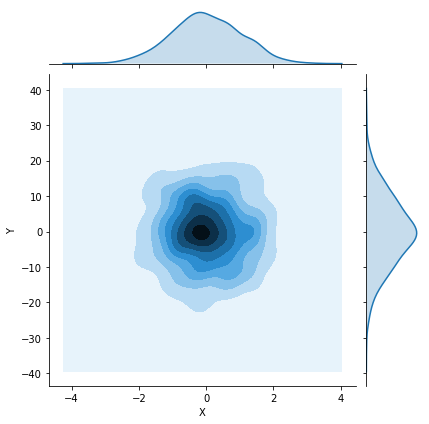

In [40]:
sns.jointplot('X','Y',dframe, kind = 'kde') 

In [ ]:
#help(np.random.multivariate_normal)

In [ ]:
#How to combine different plot styles--displot hekps us to do that
# By default displot combines kde plot & histogram

In [41]:
dataset = randn(100)

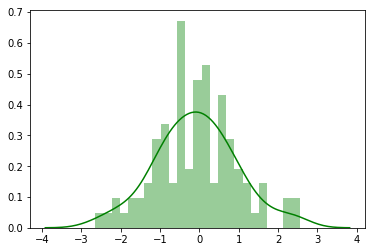

In [42]:
sns.distplot(dataset, bins = 25, color = 'green')

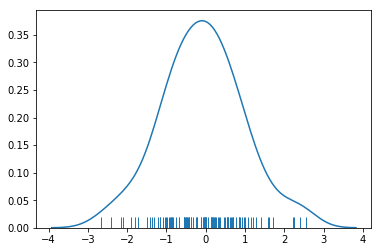

In [43]:
sns.distplot(dataset, bins = 25, rug = True, hist = False)

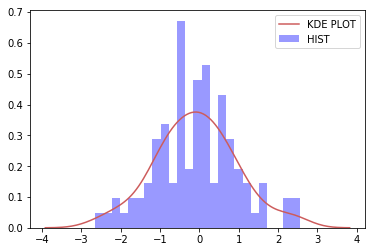

In [44]:
sns.distplot(dataset, bins = 25, 
             kde_kws = {'color':'indianred','label':'KDE PLOT'}, 
             hist_kws = {'color':'blue','label':'HIST'}, )

In [45]:
ser = Series(dataset, name = 'My_data')

#ser

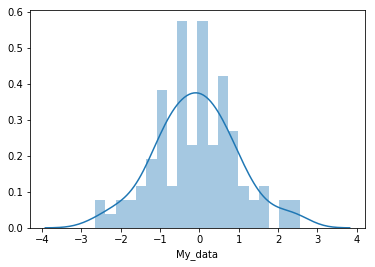

In [46]:
sns.distplot(ser,bins = 20)

In [ ]:
#Box & Violin Plot

In [47]:
data1 = randn(100)
data2 = randn(100)


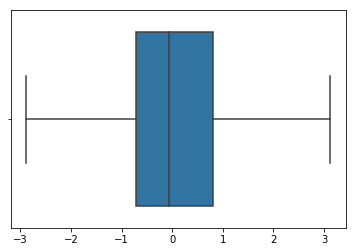

In [48]:
sns.boxplot([data1,data2],whis =np.inf)

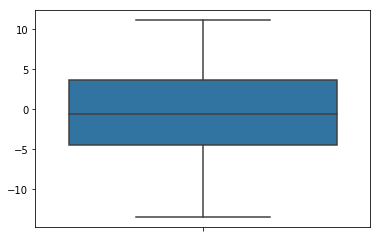

In [49]:
#where box plot wont give u d whole picture
#Normal Dist

data1 = stats.norm(0,5).rvs(100)

#Two gamma dist. concatenated together

data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                         -1 *stats.gamma(5).rvs(50)])

#Box plot both data1 and data2
sns.boxplot([data1,data2],whis = np.inf,orient = "v")


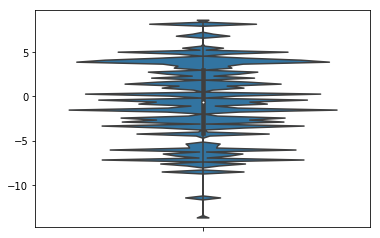

In [50]:
sns.violinplot([data1],bw = 0.01,orient = "v")

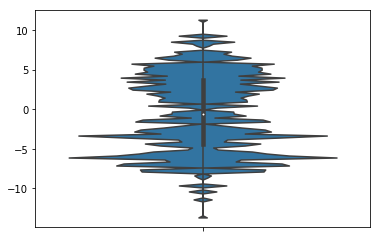

In [51]:
sns.violinplot([data1,data2],bw = 0.01,orient = "v")

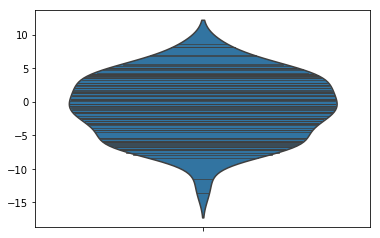

In [52]:
#we want to input a rug plot on d indivitaul point
sns.violinplot(data1,inner = 'stick',orient = "v")

In [53]:
tips = sns.load_dataset('tips')

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


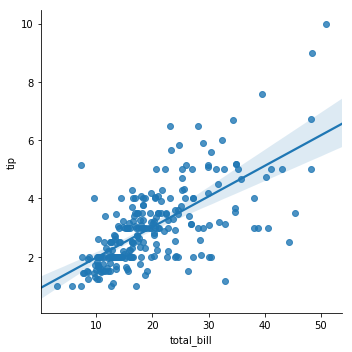

In [55]:
sns.lmplot('total_bill','tip',tips)

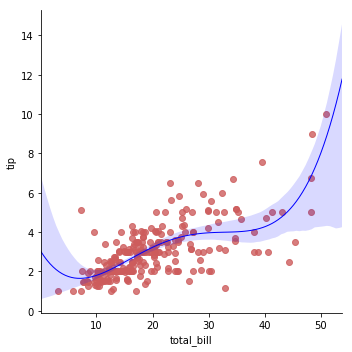

In [56]:
#We can use dict to edit individual part of d plot

sns.lmplot('total_bill','tip',tips,order = 4,
          scatter_kws ={'marker':'o','color':'indianred'},
          line_kws = {'linewidth': 1,'color': 'blue'})

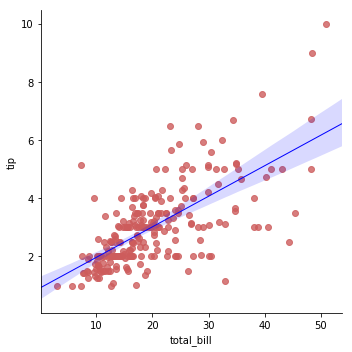

In [57]:
sns.lmplot('total_bill','tip',tips,
          scatter_kws ={'marker':'o','color':'indianred'},
          line_kws = {'linewidth': 1,'color': 'blue'})

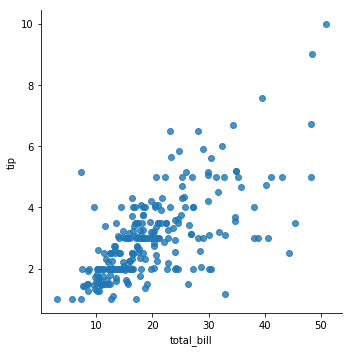

In [58]:
sns.lmplot('total_bill','tip',tips,fit_reg = False)

In [59]:
#lmplot also works on discrete variables -- the % of d tip
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
tips['tip_pecentage'] = 100 * (tips['tip']/tips['total_bill'])

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pecentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


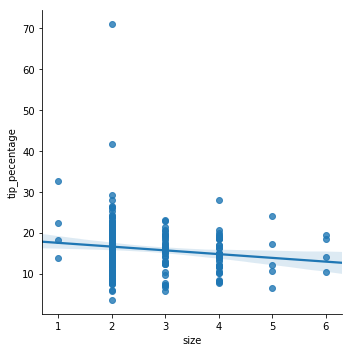

In [62]:
sns.lmplot('size','tip_pecentage',tips)

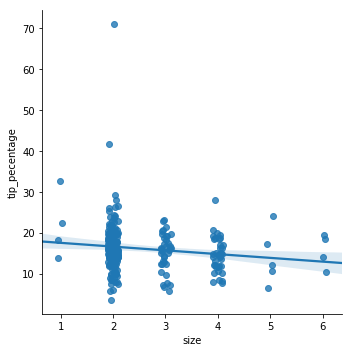

In [118]:
#jitter makes it easy for us to read
sns.lmplot('size','tip_pecentage',tips,x_jitter = .1)

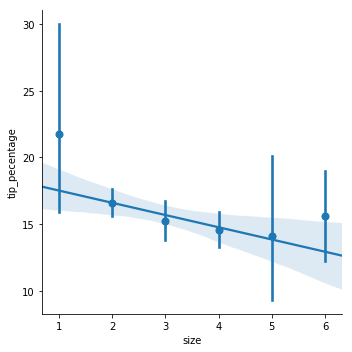

In [66]:
#extimation of d tendency of each beam
sns.lmplot('size','tip_pecentage',tips,x_estimator = np.mean) 


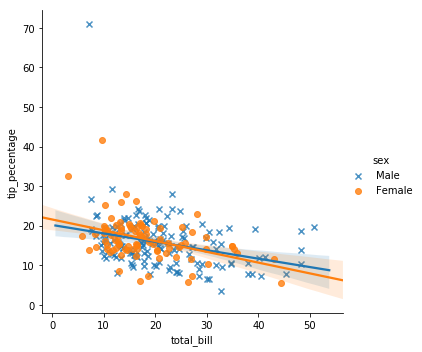

In [65]:
sns.lmplot('total_bill','tip_pecentage',tips,hue = 'sex', markers = ['x','o'])

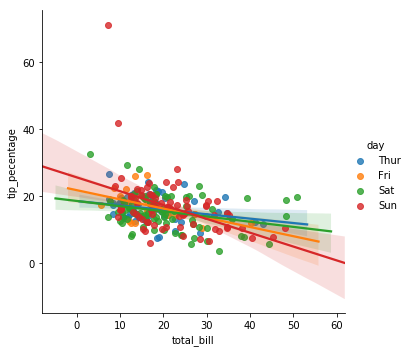

In [63]:
#does the day make a d/ff in how much tips

sns.lmplot('total_bill','tip_pecentage',tips,hue = 'day')

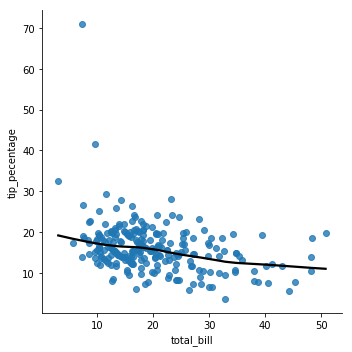

In [67]:
#seaborn also support  local regression & model techniques
#line_kws is use to edit our lines

sns.lmplot('total_bill','tip_pecentage',tips,lowess = True, line_kws = {'color':'black'})

In [ ]:
#lmplot is actually using a lower level function regplot
#regplot is d lower level function that lmplot was build upon 

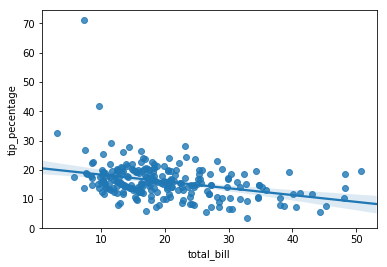

In [68]:
sns.regplot('total_bill','tip_pecentage',tips)

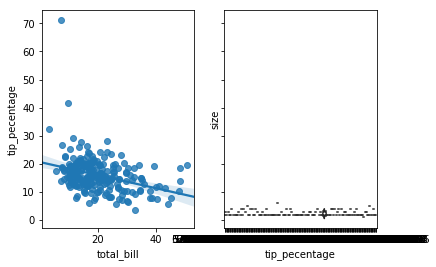

In [72]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True)
                                  
sns.regplot('total_bill','tip_pecentage',tips,ax = axis1)
sns.violinplot(tips['tip_pecentage'],tips['size'], color = 'green', ax = axis2)

In [ ]:
#Heatmaps & Clustered Matrices

In [73]:
flight_dframe = sns.load_dataset('flights')

In [74]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [76]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [77]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


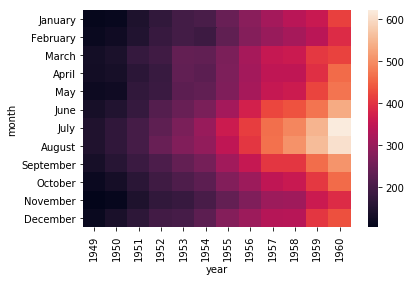

In [80]:
sns.heatmap(flight_dframe)

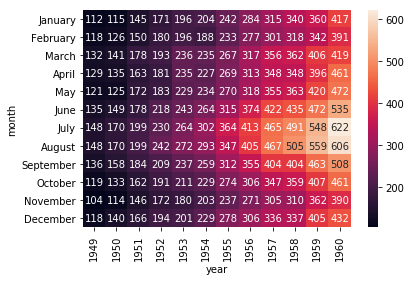

In [81]:
sns.heatmap(flight_dframe,annot = True,fmt = 'd')

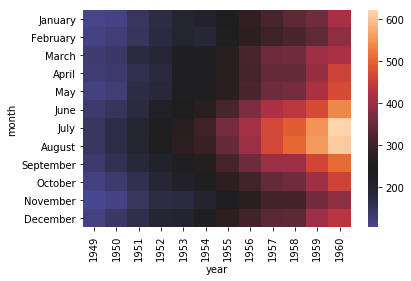

In [84]:
#specify a center for color skin

sns.heatmap(flight_dframe, center =flight_dframe.loc['January',1955])

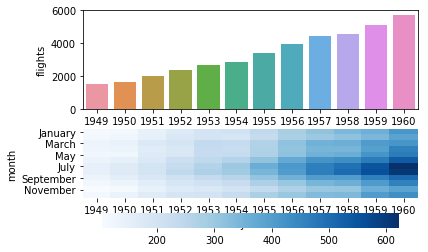

In [105]:
#we can also add heatmap on axis of subplots to make more informative fig
fig,(axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum() #total flight for d year

#grap d value & put on a dataframe
years =pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)
flights =pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights) 
#naming d dataframe columns
year_dframe = pd.concat((years,flights), axis = 1)
year_dframe.columns = ['year', 'flights']

#lets Visualize d data
sns.barplot('year', y = 'flights', data = year_dframe , ax = axis1)
#cmap is the color pallete
sns.heatmap(flight_dframe,cmap = 'Blues', 
            ax = axis2, cbar_kws = {'orientation':'horizontal'})

In [ ]:
#Cluster map-- This is going to reformat heatmap

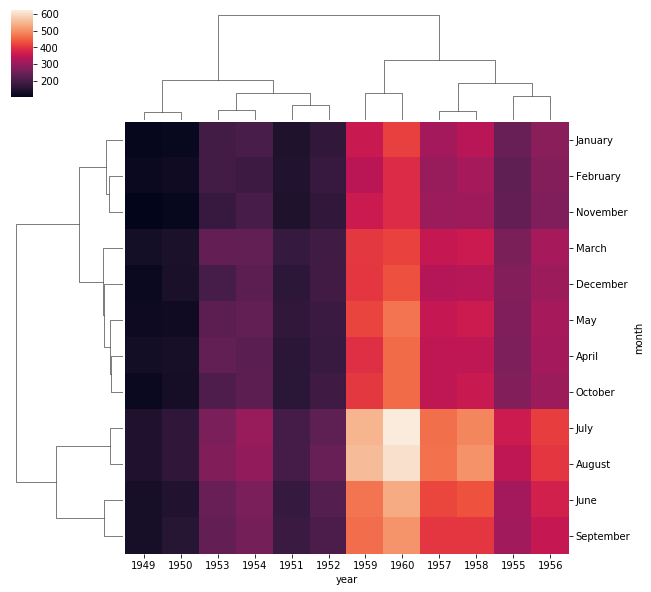

In [106]:
sns.clustermap(flight_dframe)

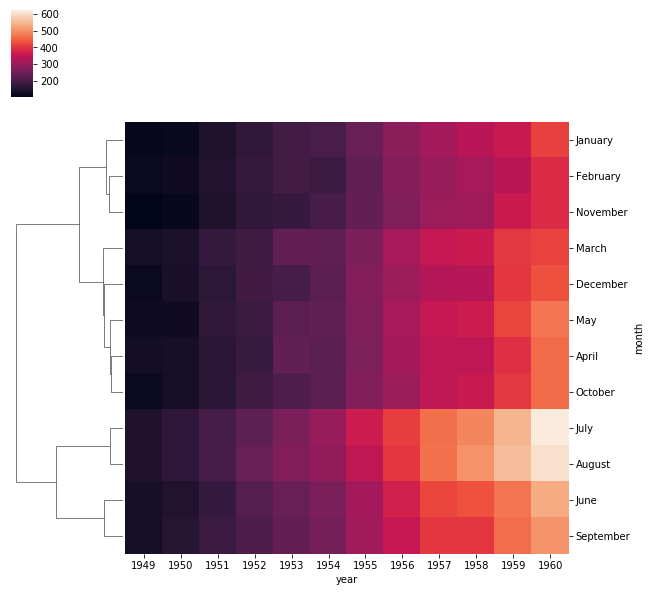

In [109]:
#Uncluster d columns

sns.clustermap(flight_dframe, col_cluster = False)

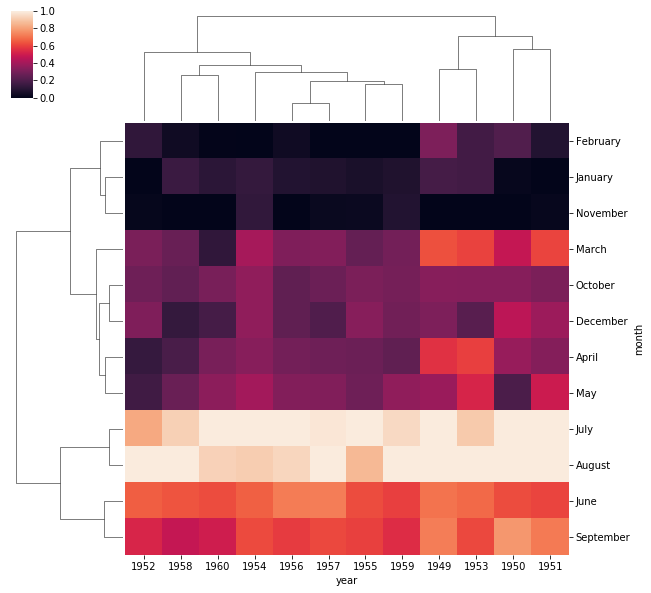

In [110]:
#lets standardize our scale since d number of flight is incresing every year

#lets set a standard scale

sns.clustermap(flight_dframe, standard_scale = 1)

#summer month are d heavy usage month(july & August )

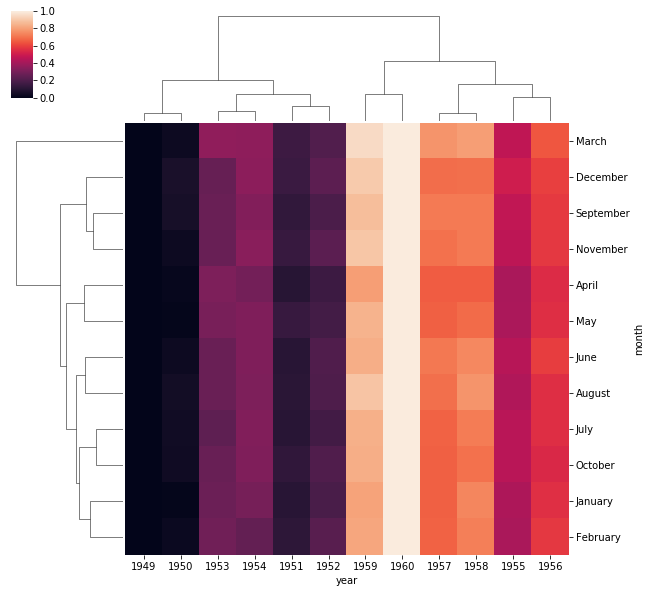

In [112]:
#Lets scale by month--(rows)
sns.clustermap(flight_dframe, standard_scale = 0)
 

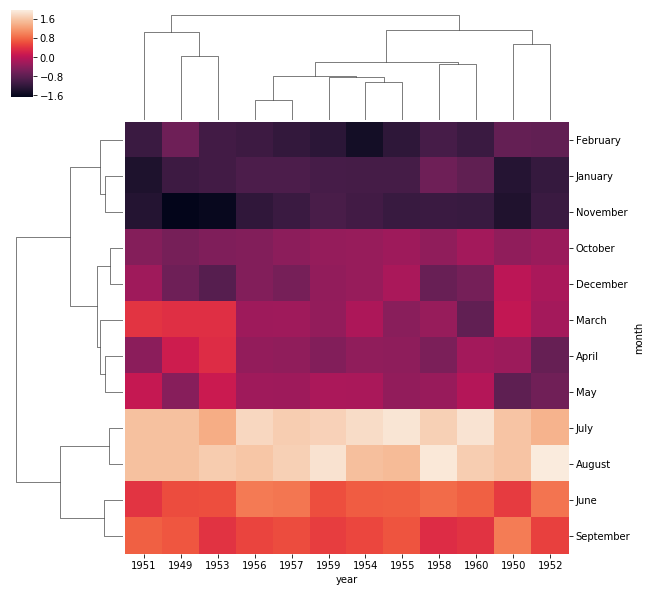

In [113]:
#normalize by z_score(rows has a mean of zero & standard deviation of 1)
sns.clustermap(flight_dframe,z_score = 1)


In [12]:
help(sns.crayons)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg